In [ ]:
# 272 ML FOR ANALYZING SKILLS AT A PRODUCTION HOUSE WHICH HELPS THE TALENT TO APPLY FOR JOB WHEN HE SEE A POSTING

In [1]:
import statsmodels.api as statsmodel

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqplot
#Adult census dataset

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as po
import plotly.offline as py 
from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization



In [2]:
pwd


'/Users/saichaitanyadasari/Downloads'

In [4]:
df=pd.read_csv('job_skills.csv')
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [5]:
#highly unbalanced dataset,
#lets describe data 
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


In [6]:
df.columns

Index(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'],
      dtype='object')

In [7]:
df.shape

(1250, 7)

In [8]:
# to show there are no missing values 
df.isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum Qualifications       True
Preferred Qualifications     True
dtype: bool

In [ ]:
#around 1693 people are active and not exited : active is subjective (how active whats the frequency etc)

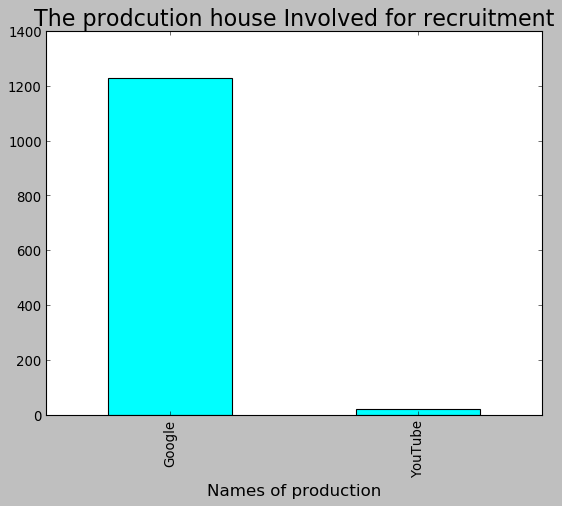

In [16]:
# The Companies involved

plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('_classic_test')

df['Company'].value_counts().plot.bar(color = 'cyan')
plt.title('The prodcution house Involved for recruitment', fontsize = 20)
plt.xlabel('Names of production', fontsize = 15)
plt.show()

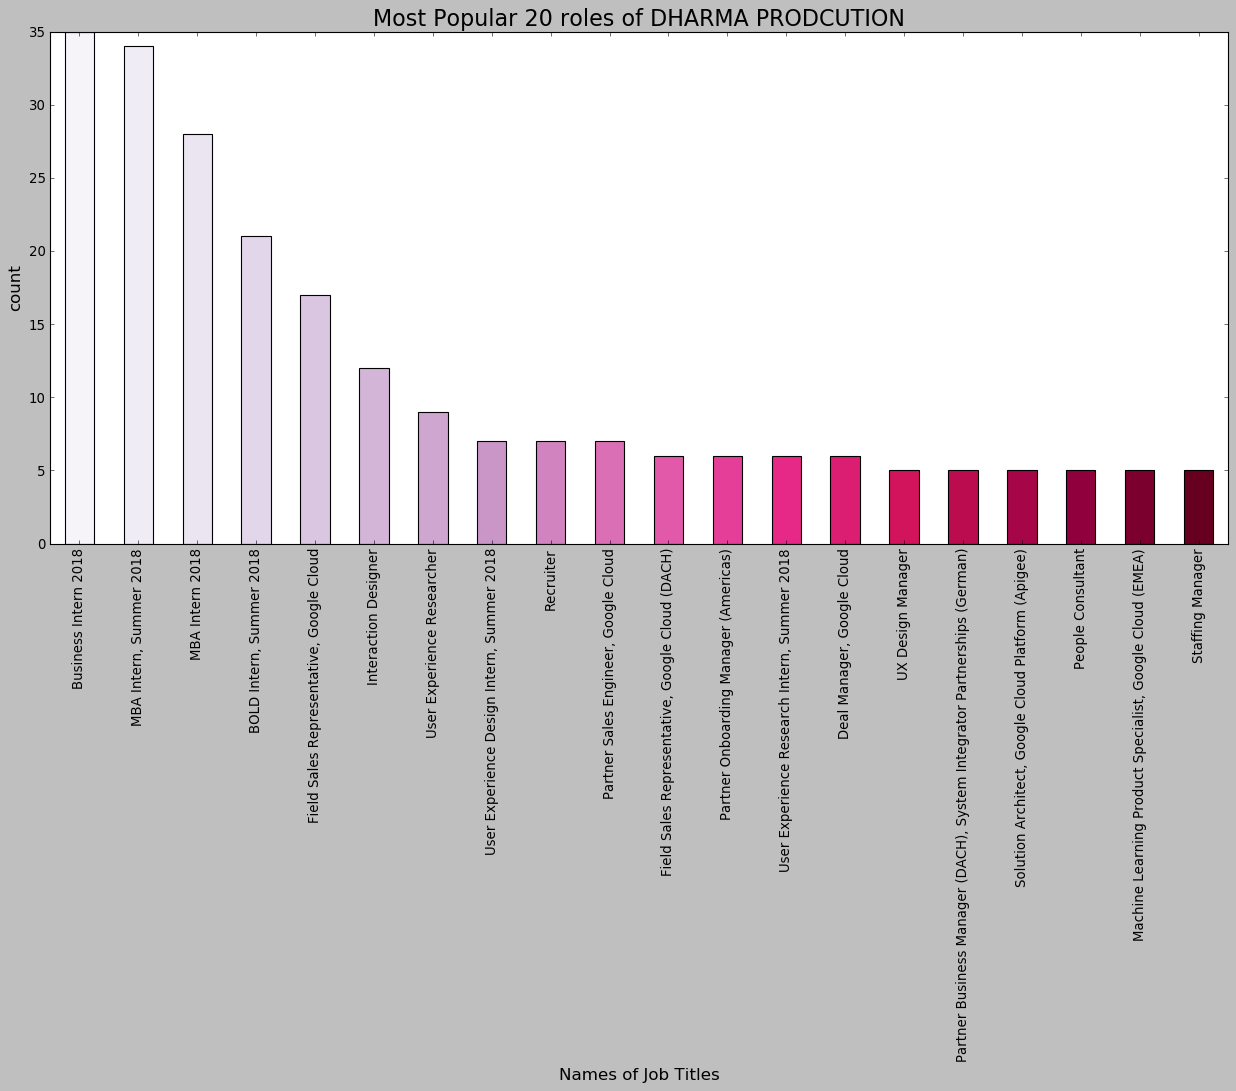

In [31]:
# checking most popular top 20 types of job Titles 

plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.PuRd(np.linspace(0, 1, 20))
df['Title'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 roles of DHARMA PRODCUTION", fontsize = 20)
plt.xlabel('Names of Job Titles', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [ ]:
# the above roles might be comming from different categoroes like MUSIC,DANCE,ARTS etc..

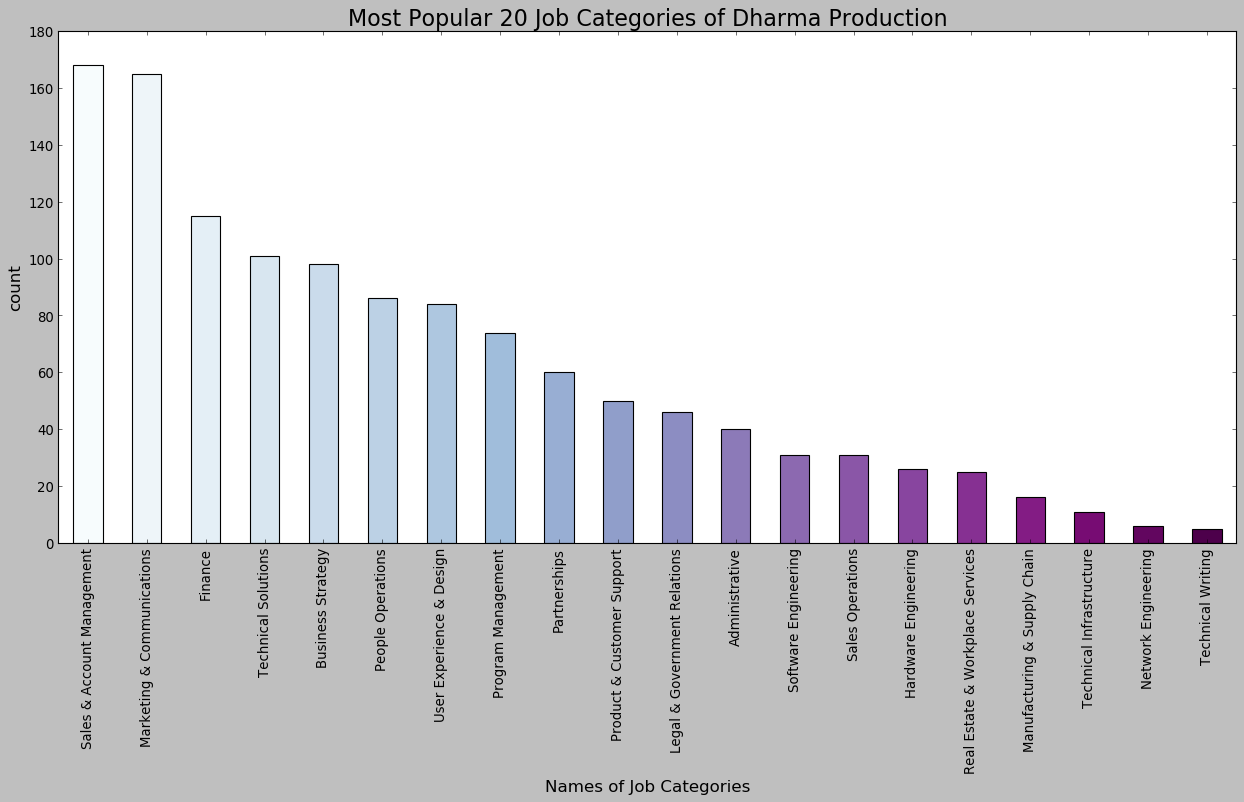

In [17]:
# checking most popular top 20 types of Job Categories

plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.BuPu(np.linspace(0, 1, 20))
df['Category'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Job Categories of Dharma Production", fontsize = 20)
plt.xlabel('Names of Job Categories', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [ ]:
# to give an Idea on what kind of jobs are more in number for a talent to apply and increase his probability of hiring

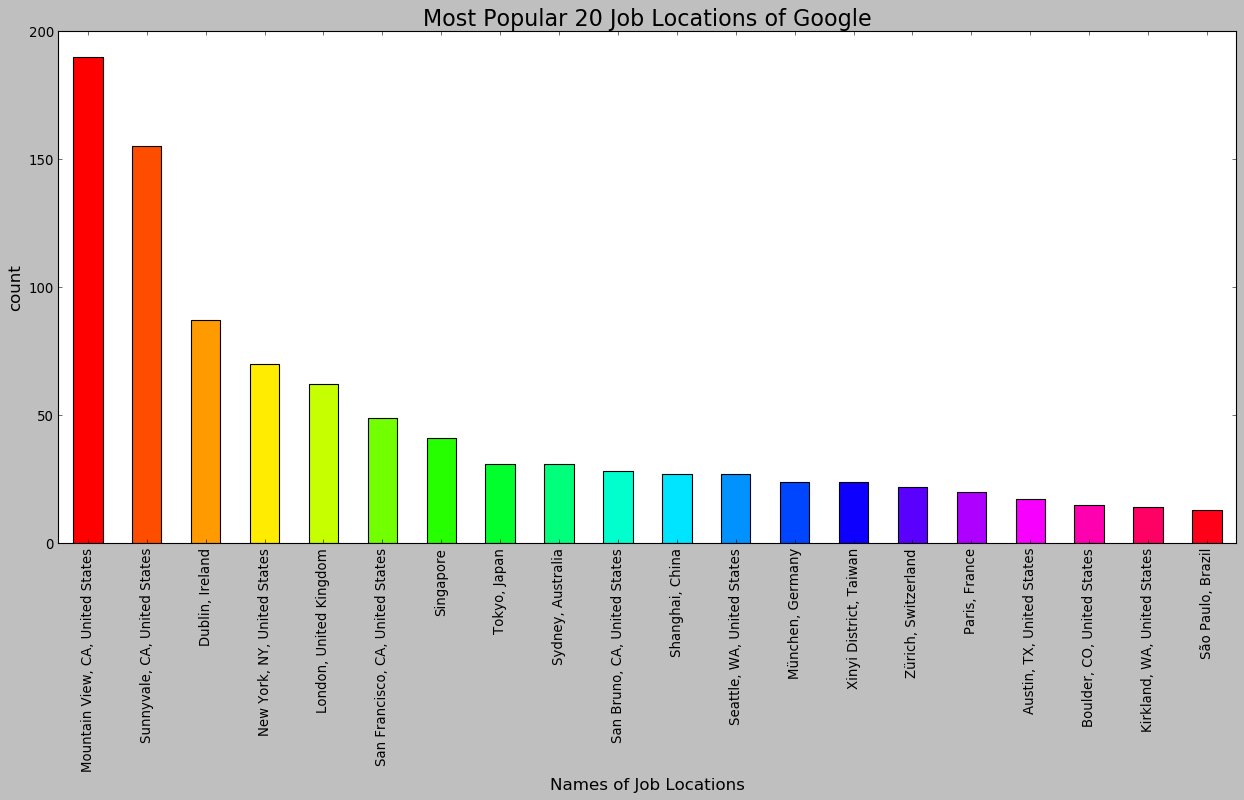

In [14]:
# checking most popular top 20 types of job Locations

plt.rcParams['figure.figsize'] = (19, 8)

color = plt.cm.hsv(np.linspace(0, 1, 20))
df['Location'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title("Most Popular 20 Job Locations of Google", fontsize = 20)
plt.xlabel('Names of Job Locations', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [20]:
df_new=pd.get_dummies(df,drop_first=True)
    

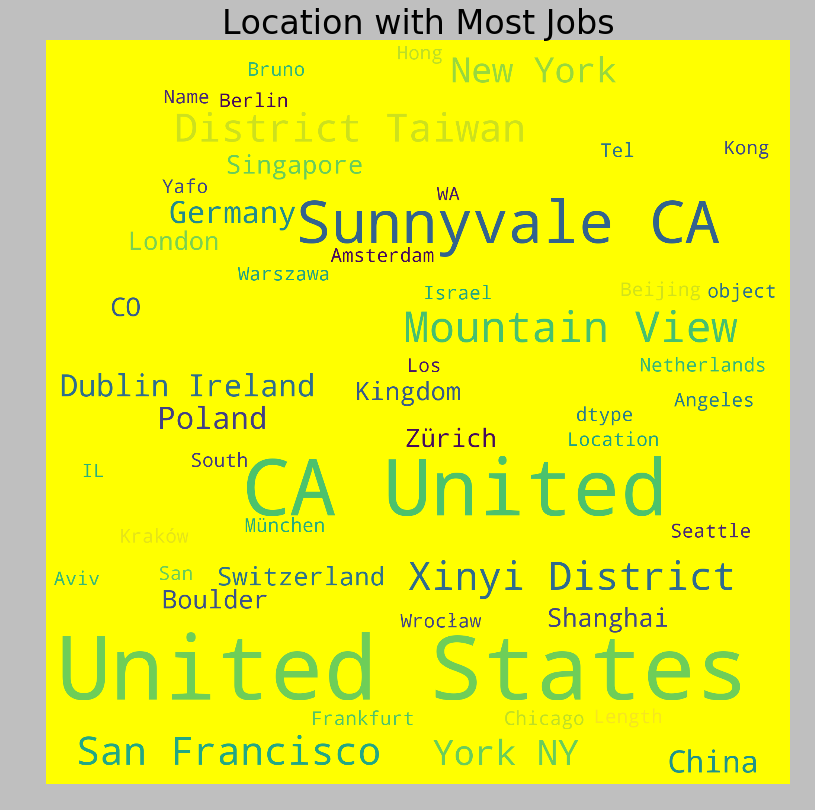

In [29]:
# checking most popular job destinations

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'yellow',
                      width = 2000,
                      height = 2000).generate(str(df['Location']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Location with Most Jobs', fontsize = 30)
plt.show()

In [ ]:
# After looking at the above cloud of words which states the most available locations for jobs in F, We can Conclude that Some of the most available Locations Include United States, 
# Switchzerland, Germany, Netherlands, and Cities of US include San Francisco, Mountain View, Los Angeles etc.

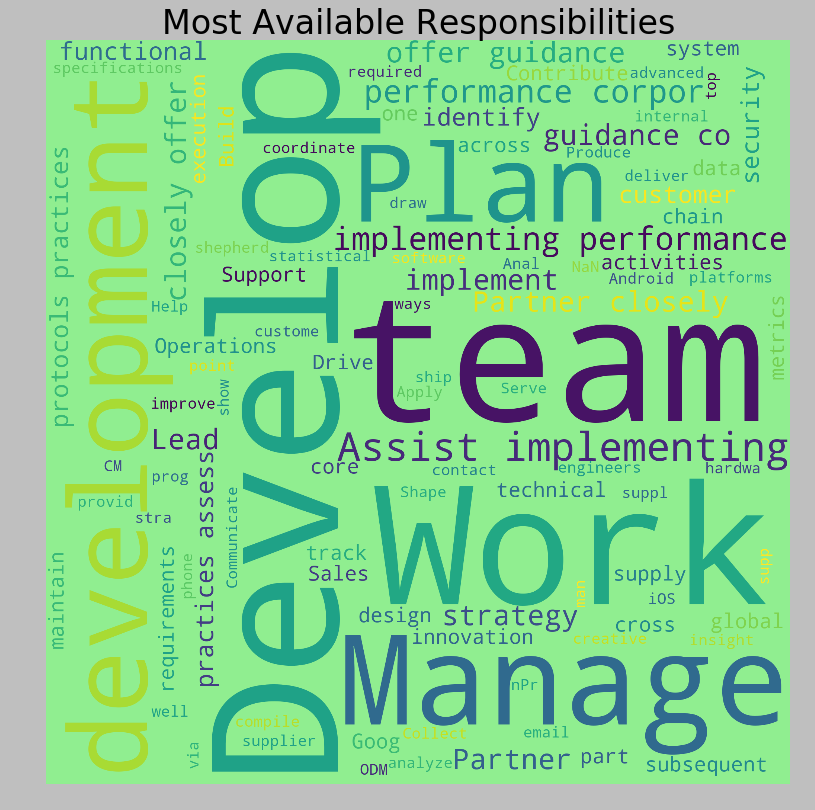

In [30]:
# checking the most popular Responsibilities

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightgreen',
                      max_words = 100,
                      width = 2000,
                      height = 2000).generate(str(df['Responsibilities']))

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
plt.imshow(wordcloud)
plt.title('Most Available Responsibilities', fontsize = 30)
plt.show()